In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Changing the current directory to the 'GitHub' sub-directory "MarineMammalSoundClassification" located in the 'My Drive' directory on Google Drive
%cd drive/My Drive/GitHub/MarineMammalSoundClassification/data/

/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data


In [3]:
# Define the path
path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data/'

In [4]:
# Import required libraries
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
print(os.listdir(path))

['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BottlenoseDolphin', 'BowheadWhale', 'ClymeneDolphin', 'CommonDolphin', 'FalseKillerWhale', 'Fin_FinbackWhale', "Fraser'sDolphin", "Grampus_Risso'sDolphin", 'HarpSeal', 'HumpbackWhale', 'KillerWhale', 'LeopardSeal', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'MinkeWhale', 'Narwhal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RossSeal', 'Rough_ToothedDolphin', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'StripedDolphin', 'Walrus', 'WeddellSeal', 'White_beakedDolphin', 'White_sidedDolphin']


In [6]:
# Load each WAV in the data directory, creating a a list of audio data and a list of sample rate using indexes
directory = '//content/drive/My Drive/GitHub/MarineMammalSoundClassification/data'

## Lists to store audio data and sample rates
audio_data_list = []
sample_rate_list = []
duration_list = []

## Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            # Load the WAV file
            filepath = os.path.join(root, filename)
            try:
                audio_data, sample_rate = librosa.load(filepath)

                # Compute file duration
                duration = len(audio_data) / sample_rate

                # Append audio data and sample rate to lists
                audio_data_list.append(audio_data)
                sample_rate_list.append(sample_rate)
                duration_list.append(duration)

                # Print information about the loaded file
                print("File:", filename)
                print("Sample Rate:", sample_rate)
                print("Duration (seconds):", duration)
                print("Shape of Audio Data:", audio_data.shape)
                print()
            except Exception as e:
                print(f"Error loading {filename}: {e}")

Streaming output truncated to the last 5000 lines.
File: 6304300M.wav
Sample Rate: 22050
Duration (seconds): 7.559773242630386
Shape of Audio Data: (166693,)

File: 6304300N.wav
Sample Rate: 22050
Duration (seconds): 17.20027210884354
Shape of Audio Data: (379266,)

File: 6304300O.wav
Sample Rate: 22050
Duration (seconds): 15.44984126984127
Shape of Audio Data: (340669,)

File: 8002001M.wav
Sample Rate: 22050
Duration (seconds): 1.6682086167800454
Shape of Audio Data: (36784,)

File: 92201001.wav
Sample Rate: 22050
Duration (seconds): 29.59269841269841
Shape of Audio Data: (652519,)

File: 92201002.wav
Sample Rate: 22050
Duration (seconds): 5.084671201814059
Shape of Audio Data: (112117,)

File: 92201003.wav
Sample Rate: 22050
Duration (seconds): 1.3322902494331066
Shape of Audio Data: (29377,)

File: 92201005.wav
Sample Rate: 22050
Duration (seconds): 4.0810884353741494
Shape of Audio Data: (89988,)

File: 92201007.wav
Sample Rate: 22050
Duration (seconds): 12.787120181405896
Shape of

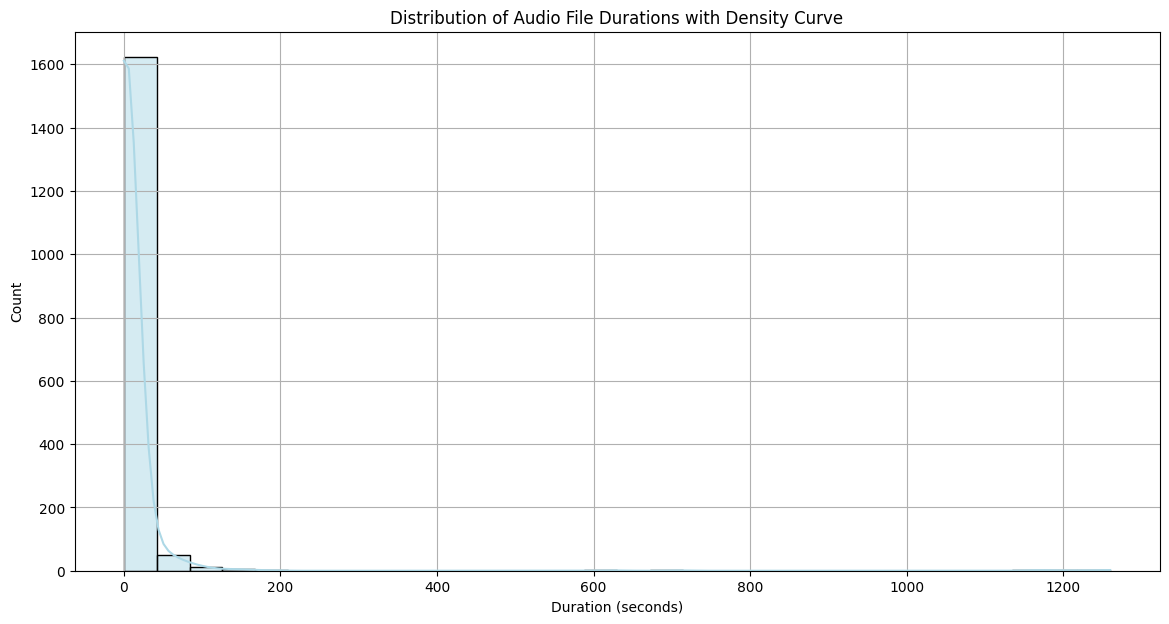

In [7]:
# Visualize the distribution of audio file durations (histogram with density curve)

plt.figure(figsize=(14, 7))
sns.histplot(duration_list, kde=True, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio File Durations with Density Curve')
plt.grid(True)
plt.show()

In [8]:
# Create dictionairies to hold audio data and class counts
class_audio_data = {}
class_counts = {}

# Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename.endswith('.wav'):
      class_name = os.path.basename(root)
      filepath = os.path.join(root, filename)
      try:
        # Load the WAV file, with original sample rate
        audio_data, sample_rate = librosa.load(filepath, sr=None)

        # Append audio data to the class dictionary
        if class_name not in class_audio_data:
          class_audio_data[class_name] = []
          class_counts[class_name] = 0
        class_audio_data[class_name].append((audio_data, sample_rate))
        class_counts[class_name] += 1

        # Print information about the loaded file
        print(f"Loaded '{filename}' from class '{class_name}'. Sample rate: {sample_rate}, Duration: {len(audio_data) / sample_rate} seconds")
      except Exception as e:
        print(f"Error loading {filename}: {e}")

# Print summary statistics
print("\nSummary:")
for class_name, audios in class_audio_data.items():
  print(f"Class '{class_name} has {len(audios)} instances.")
total_instances = sum(class_counts.values())
print(f"Total number of instances: {total_instances}")

Loaded '61025001.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 3.527995444191344 seconds
Loaded '61025002.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 3.527995444191344 seconds
Loaded '61025003.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 3.527995444191344 seconds
Loaded '61025004.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 1.763986332574032 seconds
Loaded '61025006.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 1.763986332574032 seconds
Loaded '61025007.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 1.763986332574032 seconds
Loaded '61025008.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 3.527995444191344 seconds
Loaded '61025009.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, Duration: 2.646013667425968 seconds
Loaded '6102500A.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 43900, D

In [9]:
# Print summary statistics in a table format
# Create a DataFrame from the class counts
class_summary_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Instances'])

# Calculate the total number of instances
total_instances = class_summary_df['Number of Instances'].sum()

# Calculate the total number of classes
total_classes = len(class_summary_df)

# Append these totals to the DataFrame
total_instances_df = pd.DataFrame([['Total Instances', total_instances]], columns=['Class', 'Number of Instances'])
total_classes_df = pd.DataFrame([['Total Classes', total_classes]], columns=['Class', 'Number of Instances'])
class_summary_df = pd.concat([class_summary_df, total_instances_df, total_classes_df], ignore_index=True)

# Display the DataFrame as styled table
class_summary_styled = class_summary_df.style.set_properties(**{'text-align': 'left'})
class_summary_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Highlight the total rows
def highlight_totals(row):
    if 'Total' in row['Class']:
        return ['font-weight: bold; background-color: #00008B']*2  # Light blue background for total rows
    return ['']*2

class_summary_styled = class_summary_styled.apply(highlight_totals, axis=1)
class_summary_styled

,Class,Number of Instances
0,AtlanticSpottedDolphin,58
1,BeardedSeal,37
2,Beluga_WhiteWhale,50
3,BottlenoseDolphin,24
4,BowheadWhale,60
5,ClymeneDolphin,63
6,CommonDolphin,52
7,FalseKillerWhale,59
8,Fin_FinbackWhale,50
9,Fraser'sDolphin,87


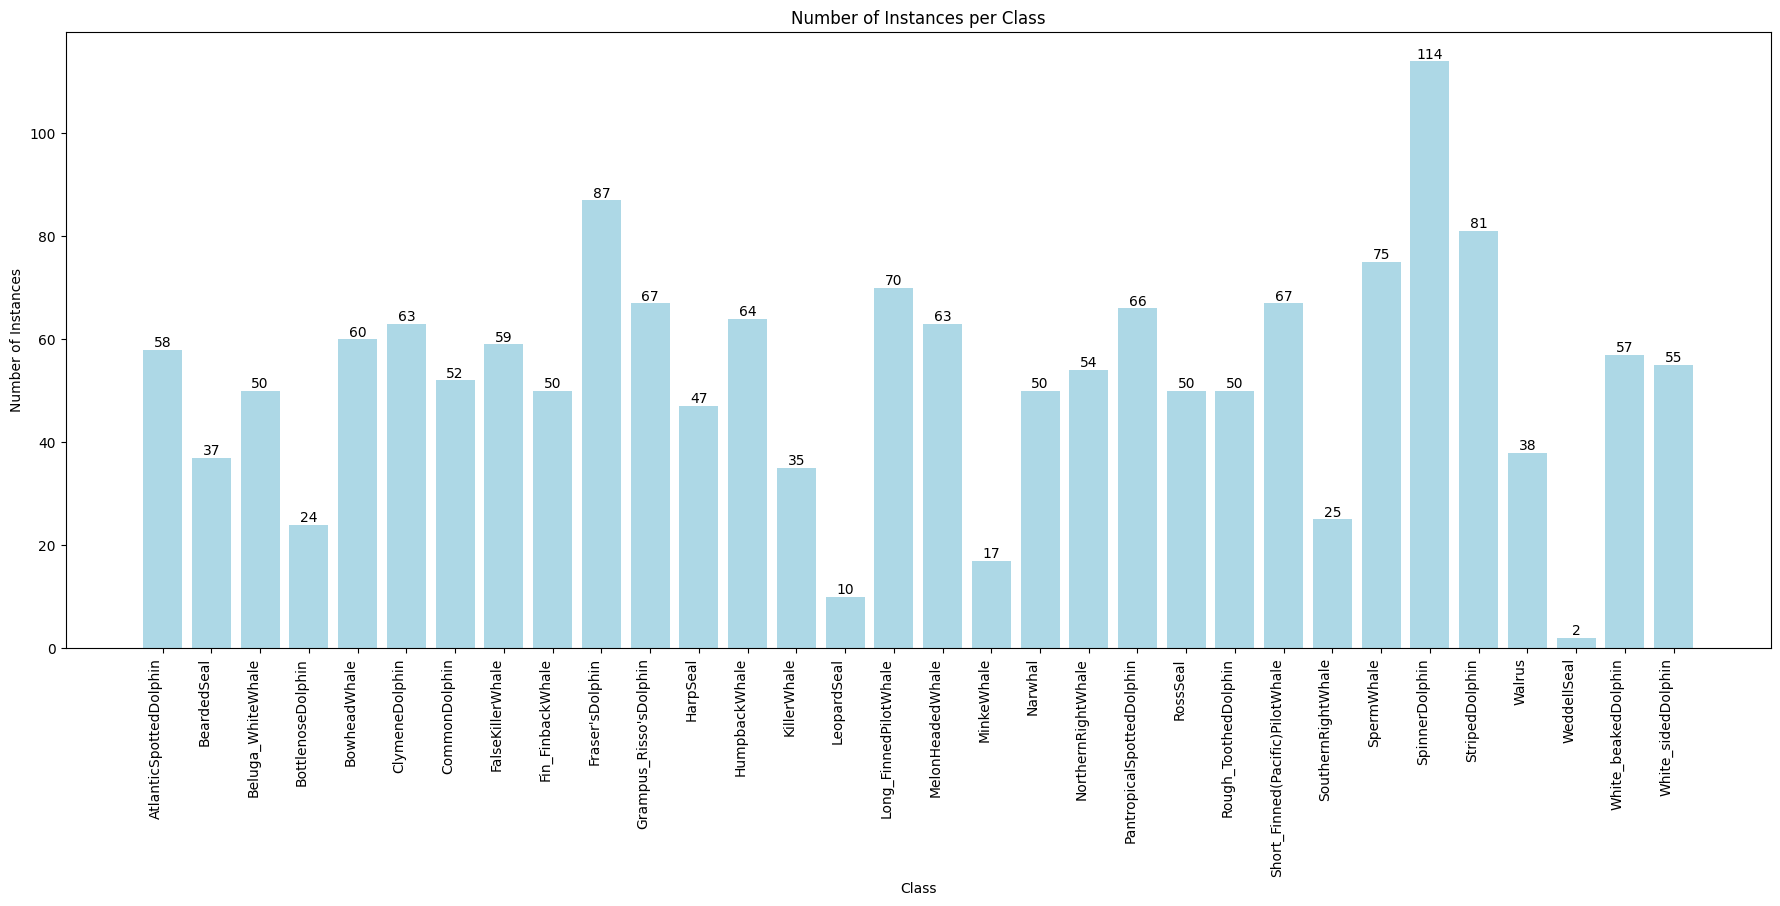

In [10]:
# Visualize the class distribution
plt.figure(figsize=(22, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='lightblue')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')
plt.xticks(rotation=90, ha="right")  # Rotate class labels for better visibility
plt.show()

In [11]:
# A preview of the length of the files

# Dictionaries to store durations for each class
class_durations = {}

# Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            class_name = os.path.basename(root)  # Assuming each class is a directory
            filepath = os.path.join(root, filename)
            try:
                # Load the WAV file with original sample rate
                audio_data, sample_rate = librosa.load(filepath, sr=None)
                duration = len(audio_data) / sample_rate
                if class_name not in class_durations:
                    class_durations[class_name] = []
                class_durations[class_name].append(duration)
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Data structure to hold the summary for each class
class_summary_stats = {}

# Calculate the 5-number summary for each class
for class_name, durations in class_durations.items():
    summary = pd.Series(durations).describe(percentiles=[.25, .5, .75])
    class_summary_stats[class_name] = {
        'min': summary['min'],
        '25%': summary['25%'],
        'median': summary['50%'],
        '75%': summary['75%'],
        'max': summary['max']
    }

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Calculate the 5-number summary for each class and store in a DataFrame
class_summary_stats = {class_name: pd.Series(durations).describe(percentiles=[.25, .5, .75]).to_dict()
                       for class_name, durations in class_durations.items()}
summary_df = pd.DataFrame(class_summary_stats).T

# Display the DataFrame
print(summary_df.to_string())

                                 count       mean         std        min        25%        50%        75%          max
AtlanticSpottedDolphin            58.0   2.651345    7.505645   0.864554   1.332499   1.489050   1.763986    58.623168
BeardedSeal                       37.0   9.573095   24.404341   0.750000   1.417969   2.835938   6.539800   142.500000
Beluga_WhiteWhale                 50.0   2.626717    1.655173   0.522300   1.394531   2.097962   3.765553     8.731875
BottlenoseDolphin                 24.0   1.241549    0.217944   0.768581   1.125000   1.265490   1.303125     1.875000
BowheadWhale                      60.0   7.484944   18.575005   1.824000   3.605925   4.101300   5.393550   142.500000
ClymeneDolphin                    63.0   2.576001    3.705874   0.305168   1.417969   1.919760   2.582809    24.106073
CommonDolphin                     52.0   6.610223   15.132794   0.220699   1.139382   1.854191   2.423667    53.048185
FalseKillerWhale                  59.0   1.15774

In [12]:
# Apply a style to the DataFrame for visualisation purposes
styled_df = summary_df.style.format("{:.2f}")  # Format numbers to two decimal places
styled_df = styled_df.background_gradient(cmap='Blues')  # Apply a gradient based on values

# Display the styled DataFrame
styled_df

,count,mean,std,min,25%,50%,75%,max
AtlanticSpottedDolphin,58.00,2.65,7.51,0.86,1.33,1.49,1.76,58.62
BeardedSeal,37.00,9.57,24.40,0.75,1.42,2.84,6.54,142.50
Beluga_WhiteWhale,50.00,2.63,1.66,0.52,1.39,2.10,3.77,8.73
BottlenoseDolphin,24.00,1.24,0.22,0.77,1.12,1.27,1.30,1.88
BowheadWhale,60.00,7.48,18.58,1.82,3.61,4.10,5.39,142.50
ClymeneDolphin,63.00,2.58,3.71,0.31,1.42,1.92,2.58,24.11
CommonDolphin,52.00,6.61,15.13,0.22,1.14,1.85,2.42,53.05
FalseKillerWhale,59.00,1.16,0.95,0.29,0.61,0.90,1.29,5.77
Fin_FinbackWhale,50.00,49.54,25.45,5.94,27.86,43.85,69.53,101.91
Fraser'sDolphin,87.00,5.83,9.28,0.34,0.94,1.89,3.78,32.76


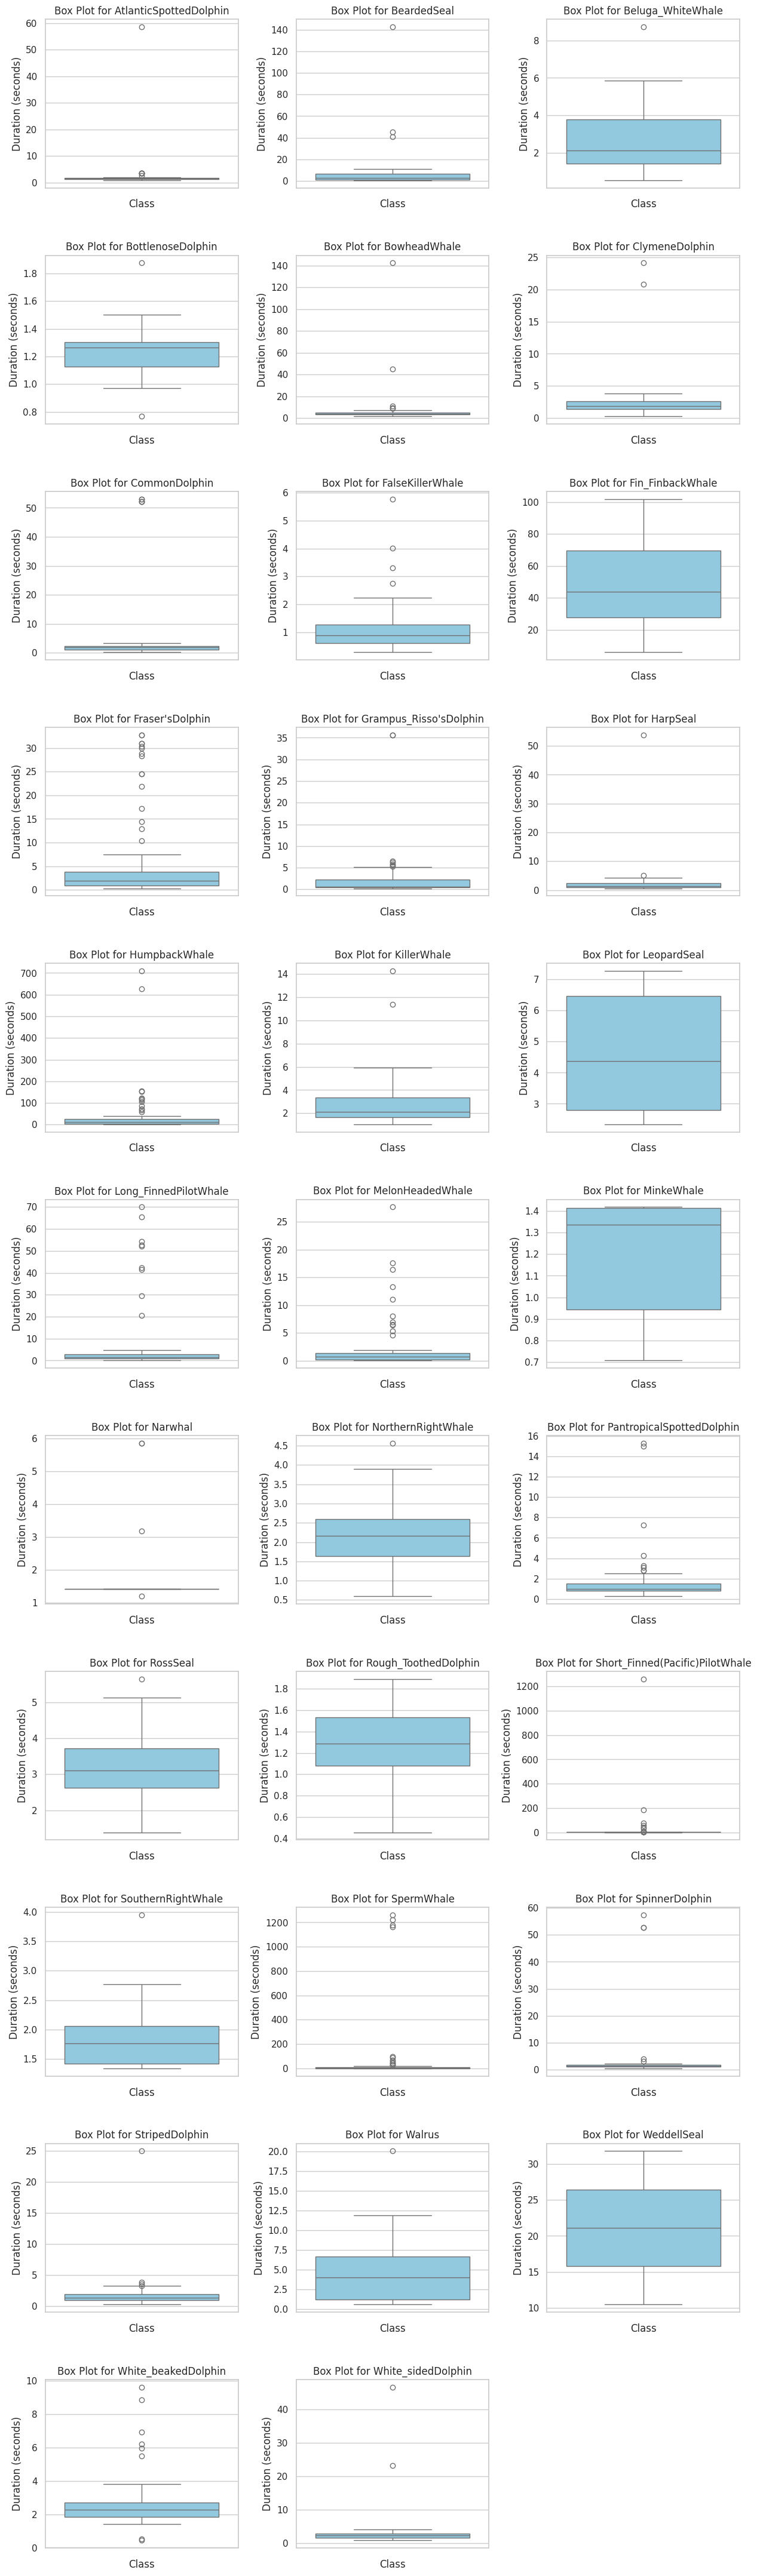

In [13]:
# Visualise data with histograms
import seaborn as sns

# Use a whitegrid
sns.set(style="whitegrid")

# Number of plots per row
plots_per_row = 3

# Calculate the number of required rows
num_classes = len(class_durations)
num_rows = (num_classes + plots_per_row - 1) // plots_per_row

# Set up the figure and axes
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust horizontal and vertical spacing

# Plot data
for idx, (class_name, durations) in enumerate(class_durations.items()):
    ax = axs[idx // plots_per_row, idx % plots_per_row]
    sns.boxplot(data=durations, color='skyblue', ax=ax)
    ax.set_title(f'Box Plot for {class_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Duration (seconds)')

# Hide any unused axes if the number of classes isn't a perfect multiple of plots_per_row
if num_classes % plots_per_row:
    for ax in axs.flatten()[num_classes:]:
        ax.set_visible(False)

plt.show()